In [1]:
import warnings
warnings.filterwarnings("ignore")
from api import API

Using TensorFlow backend.


In [3]:
d = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {

      'Mean': {},"DSC":{'learning_rate':5*1e-10,'iterations':100},"AFHMM":{},"AFHMM_SAC":{}
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport.hdf5',
				'buildings': {

				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport.hdf5',
			'buildings': {
                
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Started Prediction using:  Mean
Started Prediction using:  DSC
Started Prediction using:  AFHMM
Started Prediction using:  AFHMM_SAC
Num threads  13
finish time is  661.7836248874664
............  mae  ..............
                        Mean         DSC       AFHMM   AFHMM_SAC
fridge             48.931244   91.316231   52.383640   36.799786
air conditioner   217.217117  166.476608  132.654419  179.702332
electric furnace   70.432358   61.331348   47.400726   63.143806
washing machine     7.248257   14.200611   23.200693    4.994016
Dropping missing values
Started Prediction using:  Mean
Started Prediction using:  DSC
Started Prediction using:  AFHMM
Started Prediction using:  AFHMM_SAC
Num threads  14
finish time is  710.1210834980011
............  mae  ..............
                        Mean         DSC       AFHMM  AFHMM_SAC
fridge             39.046425   99.902061   39.749119  27.7265

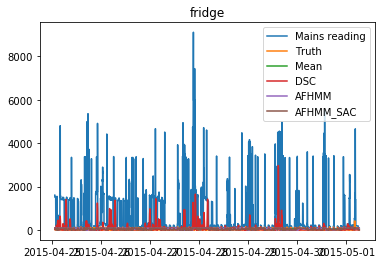

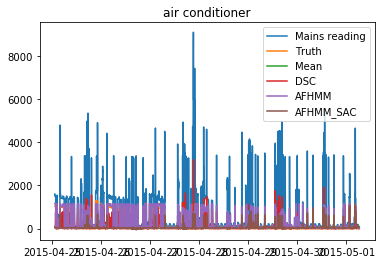

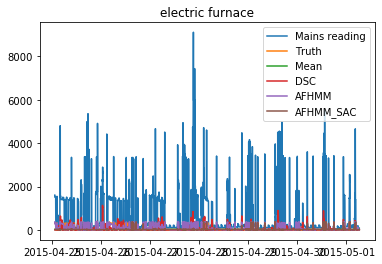

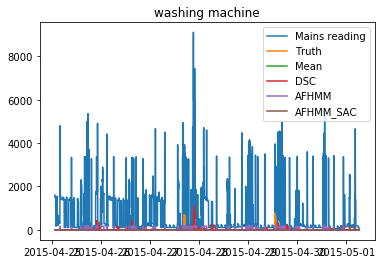

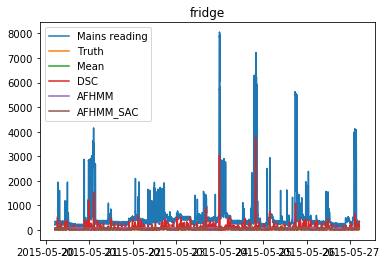

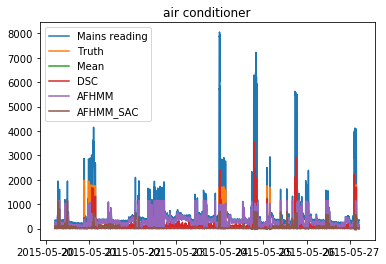

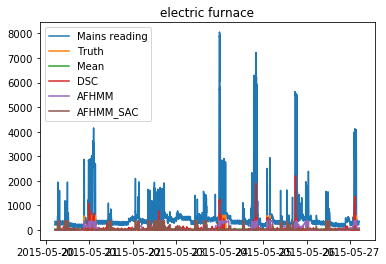

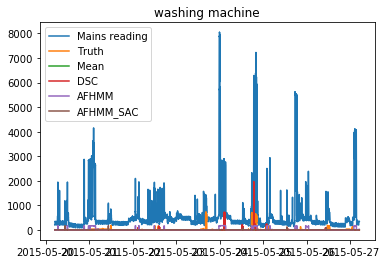

In [4]:

api_res = API(d)


In [5]:
api_res.errors

[                        Mean         DSC       AFHMM   AFHMM_SAC
 fridge             48.931244   91.316231   52.383640   36.799786
 air conditioner   217.217117  166.476608  132.654419  179.702332
 electric furnace   70.432358   61.331348   47.400726   63.143806
 washing machine     7.248257   14.200611   23.200693    4.994016,
                         Mean         DSC       AFHMM  AFHMM_SAC
 fridge             39.046425   99.902061   39.749119  27.726503
 air conditioner   135.736282  130.078827  289.302917  84.719810
 electric furnace   42.080956   43.723385   66.087463  37.496048
 washing machine    15.130778   16.190573   21.823233  13.896816]

In [6]:
api_res.errors_keys

['Datport_10_mae', 'Datport_15_mae']

In [7]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean         DSC       AFHMM   AFHMM_SAC
fridge             43.988834   95.609146   46.066380   32.263144
air conditioner   176.476700  148.277718  210.978668  132.211071
electric furnace   56.256657   52.527367   56.744095   50.319927
washing machine    11.189517   15.195592   22.511963    9.445416



Standard Deviation
                       Mean        DSC      AFHMM  AFHMM_SAC
fridge             4.942410   4.292915   6.317261   4.536641
air conditioner   40.740417  18.198891  78.324249  47.491261
electric furnace  14.175701   8.803982   9.343369  12.823879
washing machine    3.941261   0.994981   0.688730   4.451400
